In [21]:
scipy.io.savemat('data/1/data.mat',dict([('ks_data_origin',ks_data_origin),
                ('b.output_w',b.output_w),('rmse',rmse),('rmse_vec',rmse_vec),
                ('rmse_vert',rmse_vert),('pred_output',pred_output),('xx_',xx_),
                ('tt',tt)]))

In [1]:
#!/usr/bin/python

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import scipy.io

# import os
# import sys
import numpy as np

import time

from reservoir import Reservoir
import data1D
import data_utils

%load_ext autoreload
%autoreload 2
%aimport data1D
%aimport reservoir


%matplotlib inline
import matplotlib.pyplot as plt

# setx PATH "%PATH%;C:\Octave\Octave-5.1.0.0

In [2]:
# Input data
n_sequence=1
spatial_points = 42
spatial_points_ = spatial_points
lyap_exp = 0.0461
n_train = 2000
n_test = 1000
forget = 100
parallel_runs = 1
ks_data_origin, xx_, tt = data1D.kuramoto_sivashinsky_matlab(sequence_length=n_train+n_test, n_sequence=n_sequence, spatial_points=spatial_points)
# ks_data_origin=ks_data_origin+np.random.rand(ks_data_origin.shape[0],ks_data_origin.shape[1],ks_data_origin.shape[2])
ks_data_train = ks_data_origin[:, :n_train, :]
input_shape=ks_data_train.shape


In [ ]:
b = Reservoir(n_res=2000, res_scale=0.21, res_encoding='phase',
              input_enc_param=np.pi, res_enc_param=np.pi,
              input_scale=0.21, input_encoding='phase',
#               scale_input_MinMax = (-np.pi, np.pi), scale_res_MinMax = (0, 0.1), scale_output_MinMax = (-np.pi, np.pi), # data standardization
              raw_input_feature = True, enc_input_feature = False, # concatenated states properties
              random_projection='simulation', weights_type='complex gaussian',
              activation_fun='intensity_in_tanh', activation_param=np.pi/2,
              parallel_runs=parallel_runs, bias_scale=0, leak_rate=0,
              pred_horizon=1, rec_pred_steps=460, forget = forget,
              train_method='ridge', train_param=1, verbose=1
             )

# Algorithm training
b.fit(ks_data_train);

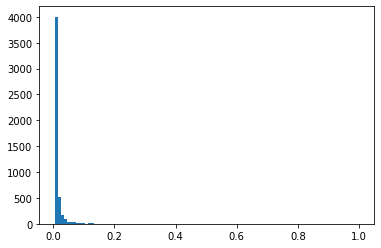

In [4]:
plt.hist(b.xx, bins=100);

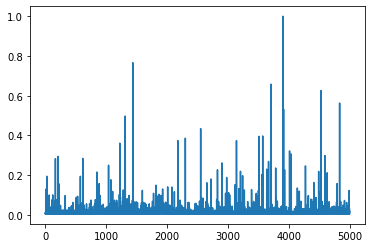

In [5]:
plt.plot(b.xx)

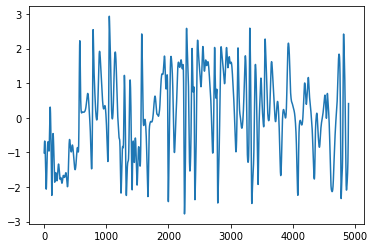

In [6]:
plt.plot(b.c[0, :, -41])

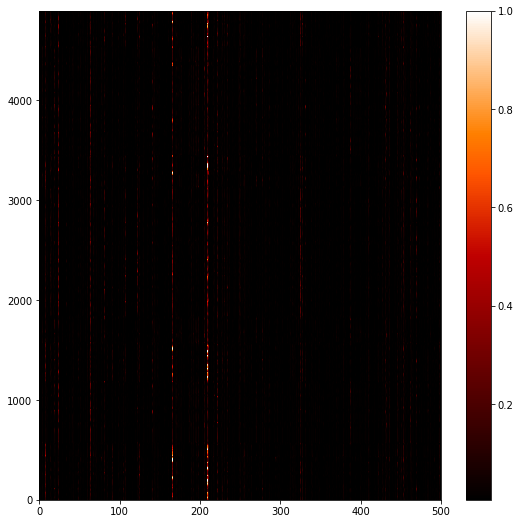

In [7]:
plt.figure(1,figsize=(9,9))
im=plt.pcolormesh(b.c[0, :, :500], cmap='gist_heat')
plt.colorbar(im)
plt.savefig('only_intensity.png')

In [6]:
# testing data
# ks_data_test, _, _ = data1D.kuramoto_sivashinsky_matlab(sequence_length=n_test, n_sequence=n_sequence, spatial_points=spatial_points)
# ks_data_test = ks_data_origin

parallel = 100
ks_data_test = ks_data_origin[:, n_train:, :]

In [7]:
# Algorithm testing
# b.forget = n_test - b.pred_horizon*b.rec_pred_steps - parallel
# b.parallel_runs = parallel_runs
pred_output, rmse, rmse_vec, rmse_vert = b.predict_and_score(ks_data_test, detailed_score=True, 
                                                  parallel=parallel)
# print(pred_output[:4, :5])
# print(rmse.shape)
print(rmse_vec[:5])
# print(rmse_vert[:5])

Reservoir Computing algorithm - Testing phase:

Initialization complete. 		Elapsed time: 0.00044345855712890625 s


(1, 100, 2000) (1, 100, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100, 1, 42)
(100, 1, 2000) (100,

KeyboardInterrupt: 

best plot is at 122


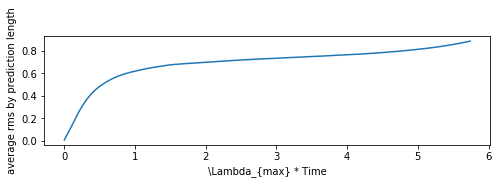

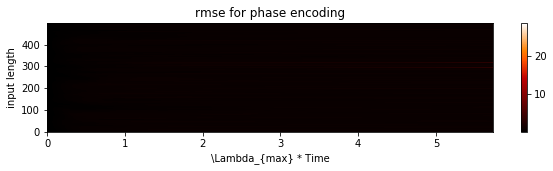

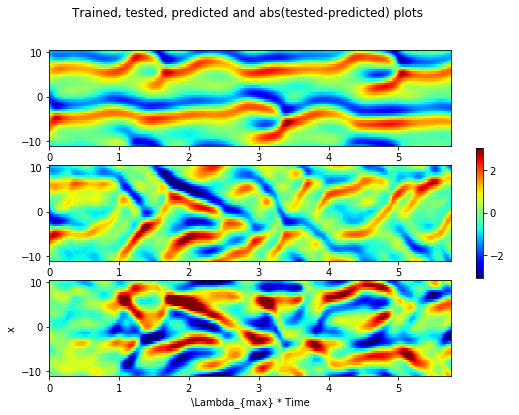

In [83]:
b.forget = n_test - b.pred_horizon*b.rec_pred_steps - parallel
total_pred = (rmse.shape[1])
length_input = pred_output.shape[0] - total_pred
time_input = range(rmse.shape[0])
time_pred = tt[0:total_pred]*lyap_exp

plt.figure(1,figsize=(8,2))
plt.ylabel('average rms by prediction length')
plt.xlabel('\Lambda_{max} * Time')
plt.plot(time_pred[:], rmse_vec[:])
# scipy.io.savemat('time_pred_new_2.mat', dict(time_pred_new_2=time_pred))
# scipy.io.savemat('rmse_vec_new_2.mat', dict(rmse_vec_new_2=rmse_vec))
plt.show;
# plt.savefig('phase_LM_kuramoto_rmse.png', dpi=400)

plt.figure(2,figsize=(10,2))
plt.title('rmse for phase encoding')
plt.ylabel('input length')
plt.xlabel('\Lambda_{max} * Time')
im=plt.pcolormesh(time_pred[:], time_input[:], rmse[:,:], cmap='gist_heat')
plt.colorbar(im)
plt.show;

spatial_points = spatial_points_
xx = xx_
n_input = np.argmin(np.sum(rmse[:,:100],axis=1)) # np.argmin(rmse_vert)
# i=0
# time = (tt[0:n_input] if i==0 else tt[0:total_pred])*lyap_exp
total_pred = b.pred_horizon*b.rec_pred_steps

# input_data = data_utils.scale(ks_data_test[0, b.forget:b.forget+total_pred, :], (-np.pi, np.pi))
# targetted_data = data_utils.scale(ks_data_test[0, n_input+b.forget:n_input+b.forget+total_pred, :], (-np.pi, np.pi))

input_data = ks_data_test[0, b.forget:b.forget+total_pred, :]
targetted_data = ks_data_test[0, n_input+b.forget:n_input+b.forget+total_pred, :]

prediction = pred_output[n_input, :].reshape(targetted_data.shape)

vmax = max(abs(np.concatenate((targetted_data, input_data)).flatten()))
vmin = -vmax

# plot training data
fig, axs = plt.subplots(3, 1, sharex=False, figsize=(9,6))
plt.suptitle('Trained, tested, predicted and abs(tested-predicted) plots                       ')
plt.ylabel('x')
plt.xlabel('\Lambda_{max} * Time')
# print(targetted_data.shape)
# print(prediction.shape)
# datum = [input_data, targetted_data, prediction, np.abs(targetted_data-prediction)]
datum = [targetted_data, prediction, targetted_data-prediction]
# print(datum[0].shape)
# time = (tt[0:n_input+b.forget] if i==0 else tt[0:total_pred])*lyap_exp
# xx_axs, time_axs = np.mgrid[xx, time]
xx_axs = np.zeros((spatial_points, total_pred))
time_axs = np.zeros((spatial_points, total_pred))
for i in range(total_pred):
    xx_axs[:, i] = xx
for i in range(spatial_points):
    time_axs[i, :] = (tt[n_input+b.forget:n_input+b.forget+total_pred]-tt[n_input+b.forget])*lyap_exp
for i in range(3):
    # im=axs[i].pcolormesh(time, xx, datum[i].T, cmap='viridis', vmin=vmin, vmax=vmax)
    im=axs[i].pcolormesh(time_axs, xx_axs, datum[i].T, cmap=plt.get_cmap('jet'), vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.4)
# plt.savefig('phase_SLM_kuramoto_pred.png', dpi=400)

# plt.figure(3,figsize=(9,2.5))
# im=plt.pcolormesh(time_axs, xx_axs, datum[2].T, cmap='gray')
# plt.colorbar(im)
# plt.savefig('DND_input_data.png')

print('best plot is at '+str(np.argmin(rmse_vert)))

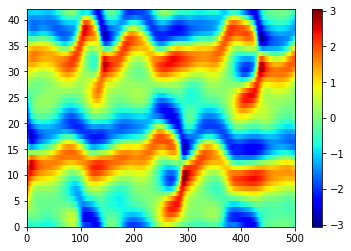

In [38]:
im=plt.pcolormesh(datum[0].T, cmap=plt.get_cmap('jet'))
plt.colorbar(im)

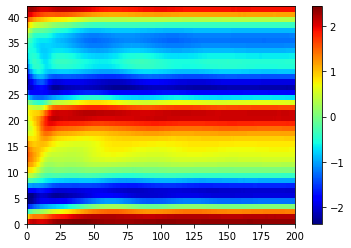

In [222]:
im=plt.pcolormesh(datum[1].T, cmap=plt.get_cmap('jet'))
plt.colorbar(im)

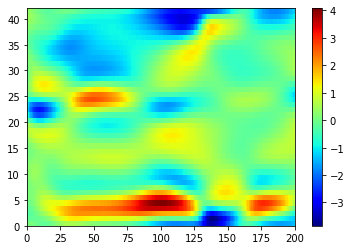

In [219]:
im=plt.pcolormesh(datum[2].T, cmap=plt.get_cmap('jet'))
plt.colorbar(im)

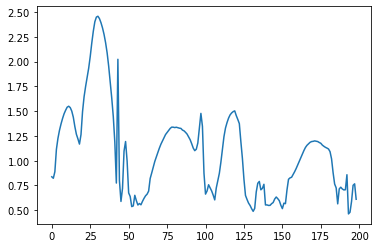

In [208]:
plt.plot(rmse_vert[:])